# Quantum Harmonic Oscillator

## Introduction

The quantum harmonic oscillator is one of the most important model systems in quantum mechanics. It serves as the foundation for understanding molecular vibrations, phonons in solids, and quantum field theory. Unlike its classical counterpart, the quantum harmonic oscillator exhibits discrete energy levels and zero-point energy.

## Classical Harmonic Oscillator Review

The classical harmonic oscillator has potential energy:

$$V(x) = \frac{1}{2}m\omega^2 x^2$$

where $m$ is the mass and $\omega$ is the angular frequency.

## Quantum Mechanical Treatment

### The Hamiltonian

The Hamiltonian operator for the quantum harmonic oscillator is:

$$\hat{H} = \frac{\hat{p}^2}{2m} + \frac{1}{2}m\omega^2\hat{x}^2$$

where $\hat{p} = -i\hbar\frac{d}{dx}$ is the momentum operator.

### Time-Independent Schrödinger Equation

The stationary states satisfy:

$$\hat{H}\psi_n(x) = E_n\psi_n(x)$$

$$-\frac{\hbar^2}{2m}\frac{d^2\psi_n}{dx^2} + \frac{1}{2}m\omega^2 x^2\psi_n = E_n\psi_n$$

### Energy Eigenvalues

The energy levels are quantized and given by:

$$E_n = \hbar\omega\left(n + \frac{1}{2}\right), \quad n = 0, 1, 2, ...$$

Key features:
- **Zero-point energy**: $E_0 = \frac{1}{2}\hbar\omega$ (the ground state has non-zero energy)
- **Equal spacing**: $\Delta E = \hbar\omega$ between adjacent levels

### Wave Functions

The normalized wave functions are:

$$\psi_n(x) = \left(\frac{m\omega}{\pi\hbar}\right)^{1/4} \frac{1}{\sqrt{2^n n!}} H_n(\xi) e^{-\xi^2/2}$$

where:
- $\xi = \sqrt{\frac{m\omega}{\hbar}}x$ is the dimensionless coordinate
- $H_n(\xi)$ are the Hermite polynomials

### Hermite Polynomials

The first few Hermite polynomials are:

$$H_0(\xi) = 1$$
$$H_1(\xi) = 2\xi$$
$$H_2(\xi) = 4\xi^2 - 2$$
$$H_3(\xi) = 8\xi^3 - 12\xi$$
$$H_4(\xi) = 16\xi^4 - 48\xi^2 + 12$$

They satisfy the recurrence relation:

$$H_{n+1}(\xi) = 2\xi H_n(\xi) - 2n H_{n-1}(\xi)$$

## Probability Density

The probability density $|\psi_n(x)|^2$ gives the likelihood of finding the particle at position $x$. For large $n$, the quantum probability distribution approaches the classical result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from scipy.special import factorial

# Set up constants (using natural units where hbar = m = omega = 1)
hbar = 1.0
m = 1.0
omega = 1.0

# Characteristic length scale
x0 = np.sqrt(hbar / (m * omega))

def psi_n(x, n):
    """
    Compute the n-th eigenfunction of the quantum harmonic oscillator.
    
    Parameters:
    -----------
    x : array-like
        Position values
    n : int
        Quantum number (n = 0, 1, 2, ...)
    
    Returns:
    --------
    psi : array-like
        Wave function values at positions x
    """
    xi = x / x0  # Dimensionless coordinate
    
    # Normalization constant
    norm = (1.0 / (np.sqrt(np.pi) * x0)) ** 0.5
    norm *= 1.0 / np.sqrt(2**n * factorial(n))
    
    # Hermite polynomial
    Hn = hermite(n)
    
    # Wave function
    psi = norm * Hn(xi) * np.exp(-xi**2 / 2)
    
    return psi

def energy_n(n):
    """
    Compute the energy of the n-th level.
    
    Parameters:
    -----------
    n : int
        Quantum number
    
    Returns:
    --------
    E : float
        Energy in units of hbar*omega
    """
    return hbar * omega * (n + 0.5)

def V(x):
    """
    Harmonic oscillator potential.
    """
    return 0.5 * m * omega**2 * x**2

print("Quantum Harmonic Oscillator - Wave Functions and Energies")
print("=" * 55)
print(f"\nUsing natural units: ℏ = m = ω = 1")
print(f"Characteristic length scale x₀ = √(ℏ/mω) = {x0:.3f}\n")

for n in range(6):
    E = energy_n(n)
    print(f"n = {n}: E_{n} = {E:.2f} ℏω")

Quantum Harmonic Oscillator - Wave Functions and Energies

Using natural units: ℏ = m = ω = 1
Characteristic length scale x₀ = √(ℏ/mω) = 1.000

n = 0: E_0 = 0.50 ℏω
n = 1: E_1 = 1.50 ℏω
n = 2: E_2 = 2.50 ℏω
n = 3: E_3 = 3.50 ℏω
n = 4: E_4 = 4.50 ℏω
n = 5: E_5 = 5.50 ℏω


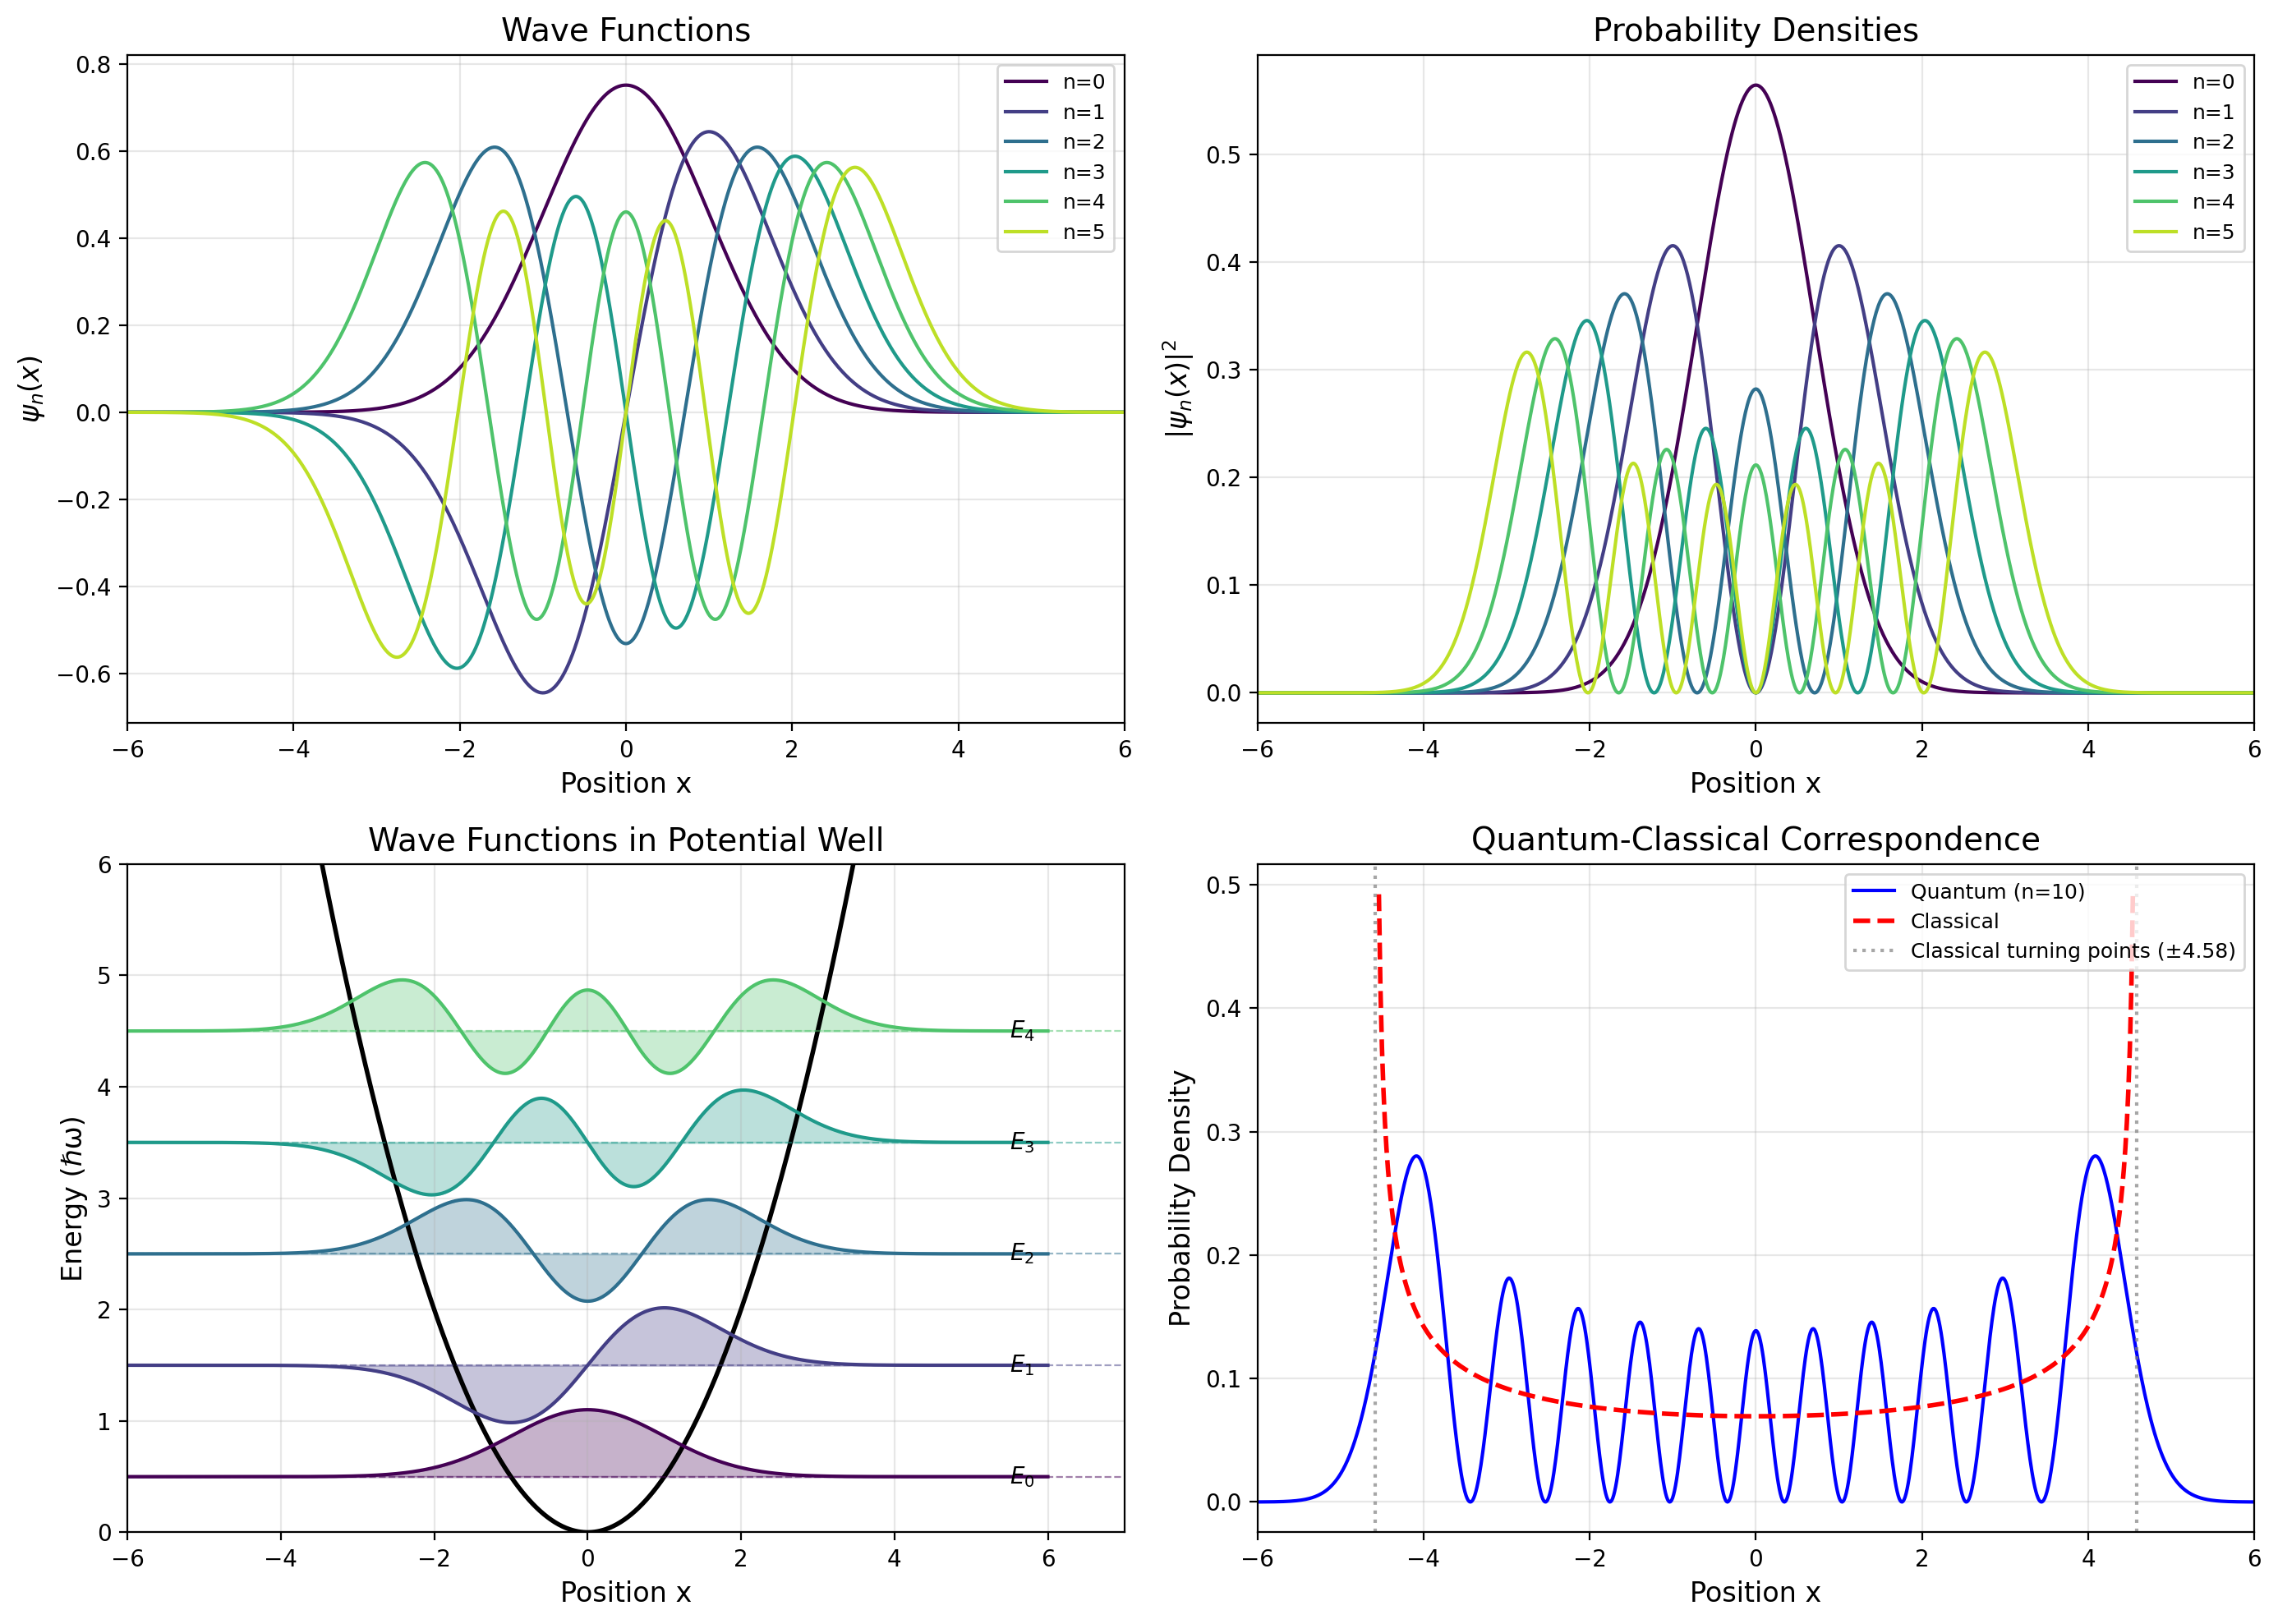


Figure saved to 'plot.png'


In [2]:
# Create figure with wave functions and probability densities
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Position array
x = np.linspace(-6, 6, 1000)

# Number of states to plot
n_states = 6
colors = plt.cm.viridis(np.linspace(0, 0.9, n_states))

# Plot 1: Wave functions
ax1 = axes[0, 0]
for n in range(n_states):
    psi = psi_n(x, n)
    ax1.plot(x, psi, color=colors[n], label=f'n={n}', linewidth=1.5)

ax1.set_xlabel('Position x', fontsize=12)
ax1.set_ylabel(r'$\psi_n(x)$', fontsize=12)
ax1.set_title('Wave Functions', fontsize=14)
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-6, 6)

# Plot 2: Probability densities
ax2 = axes[0, 1]
for n in range(n_states):
    psi = psi_n(x, n)
    prob = np.abs(psi)**2
    ax2.plot(x, prob, color=colors[n], label=f'n={n}', linewidth=1.5)

ax2.set_xlabel('Position x', fontsize=12)
ax2.set_ylabel(r'$|\psi_n(x)|^2$', fontsize=12)
ax2.set_title('Probability Densities', fontsize=14)
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-6, 6)

# Plot 3: Wave functions with potential and energy levels
ax3 = axes[1, 0]

# Plot potential
V_x = V(x)
ax3.plot(x, V_x, 'k-', linewidth=2, label='V(x)')

# Plot wave functions shifted by energy levels
for n in range(5):
    E = energy_n(n)
    psi = psi_n(x, n)
    
    # Horizontal line at energy level
    ax3.axhline(y=E, color=colors[n], linestyle='--', alpha=0.5, linewidth=0.8)
    
    # Wave function shifted by energy
    scale = 0.8  # Scale factor for visualization
    ax3.plot(x, E + scale * psi, color=colors[n], linewidth=1.5)
    ax3.fill_between(x, E, E + scale * psi, color=colors[n], alpha=0.3)
    
    # Energy label
    ax3.text(5.5, E, f'$E_{n}$', fontsize=10, va='center')

ax3.set_xlabel('Position x', fontsize=12)
ax3.set_ylabel('Energy (ℏω)', fontsize=12)
ax3.set_title('Wave Functions in Potential Well', fontsize=14)
ax3.set_xlim(-6, 7)
ax3.set_ylim(0, 6)
ax3.grid(True, alpha=0.3)

# Plot 4: Comparison with classical probability for n=10
ax4 = axes[1, 1]
n_high = 10
psi_high = psi_n(x, n_high)
prob_quantum = np.abs(psi_high)**2

# Classical probability density: P(x) = 1/(pi*sqrt(A^2 - x^2))
# where A is the classical amplitude at energy E_n
E_n = energy_n(n_high)
A = np.sqrt(2 * E_n / (m * omega**2))  # Classical turning point

# Classical probability (avoiding singularities at turning points)
x_classical = np.linspace(-A * 0.99, A * 0.99, 500)
prob_classical = 1.0 / (np.pi * np.sqrt(A**2 - x_classical**2))

ax4.plot(x, prob_quantum, 'b-', linewidth=1.5, label=f'Quantum (n={n_high})')
ax4.plot(x_classical, prob_classical, 'r--', linewidth=2, label='Classical')
ax4.axvline(x=A, color='gray', linestyle=':', alpha=0.7, label=f'Classical turning points (±{A:.2f})')
ax4.axvline(x=-A, color='gray', linestyle=':', alpha=0.7)

ax4.set_xlabel('Position x', fontsize=12)
ax4.set_ylabel('Probability Density', fontsize=12)
ax4.set_title('Quantum-Classical Correspondence', fontsize=14)
ax4.legend(loc='upper right', fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_xlim(-6, 6)

plt.tight_layout()
plt.savefig('quantum_harmonic_oscillator_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

In [3]:
# Verify orthonormality of wave functions
print("Verification of Orthonormality")
print("=" * 40)
print("\n<ψ_m|ψ_n> = δ_mn (Kronecker delta)\n")

# Fine grid for numerical integration
x_fine = np.linspace(-20, 20, 10000)
dx = x_fine[1] - x_fine[0]

# Compute inner products
n_test = 5
overlap_matrix = np.zeros((n_test, n_test))

for m in range(n_test):
    for n in range(n_test):
        psi_m = psi_n(x_fine, m)
        psi_n_val = psi_n(x_fine, n)
        overlap = np.trapz(psi_m * psi_n_val, x_fine)
        overlap_matrix[m, n] = overlap

print("Overlap matrix <ψ_m|ψ_n>:")
print(np.round(overlap_matrix, 4))
print("\n(Should be identity matrix)")

Verification of Orthonormality

<ψ_m|ψ_n> = δ_mn (Kronecker delta)

Overlap matrix <ψ_m|ψ_n>:
[[ 1. -0.  0.  0. -0.]
 [-0.  1. -0.  0. -0.]
 [ 0. -0.  1.  0.  0.]
 [ 0.  0.  0.  1. -0.]
 [-0. -0.  0. -0.  1.]]

(Should be identity matrix)


/tmp/ipykernel_160022/3226951119.py:18: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  overlap = np.trapz(psi_m * psi_n_val, x_fine)


In [4]:
# Calculate expectation values
print("\nExpectation Values")
print("=" * 40)

for n in range(5):
    psi = psi_n(x_fine, n)
    
    # <x>
    x_exp = np.trapz(psi * x_fine * psi, x_fine)
    
    # <x^2>
    x2_exp = np.trapz(psi * x_fine**2 * psi, x_fine)
    
    # Uncertainty in x
    delta_x = np.sqrt(x2_exp - x_exp**2)
    
    # Theoretical value: <x^2> = (n + 1/2) * hbar/(m*omega)
    x2_theory = (n + 0.5) * hbar / (m * omega)
    
    print(f"\nn = {n}:")
    print(f"  <x>   = {x_exp:.6f} (theory: 0)")
    print(f"  <x²>  = {x2_exp:.4f} (theory: {x2_theory:.4f})")
    print(f"  Δx    = {delta_x:.4f}")


Expectation Values

n = 0:
  <x>   = 0.000000 (theory: 0)
  <x²>  = 0.5000 (theory: 0.1250)
  Δx    = 0.7071

n = 1:
  <x>   = 0.000000 (theory: 0)
  <x²>  = 1.5000 (theory: 0.3750)
  Δx    = 1.2247

n = 2:
  <x>   = 0.000000 (theory: 0)
  <x²>  = 2.5000 (theory: 0.6250)
  Δx    = 1.5811

n = 3:
  <x>   = 0.000000 (theory: 0)
  <x²>  = 3.5000 (theory: 0.8750)
  Δx    = 1.8708

n = 4:
  <x>   = -0.000000 (theory: 0)
  <x²>  = 4.5000 (theory: 1.1250)
  Δx    = 2.1213


/tmp/ipykernel_160022/636271096.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  x_exp = np.trapz(psi * x_fine * psi, x_fine)
/tmp/ipykernel_160022/636271096.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  x2_exp = np.trapz(psi * x_fine**2 * psi, x_fine)


## Key Results and Observations

### Energy Quantization
- Energy levels are equally spaced: $E_n = \hbar\omega(n + 1/2)$
- The ground state ($n=0$) has non-zero energy $E_0 = \frac{1}{2}\hbar\omega$ (zero-point energy)

### Wave Function Properties
- Even $n$: symmetric wave functions (even parity)
- Odd $n$: antisymmetric wave functions (odd parity)
- Number of nodes = $n$

### Orthonormality
The wave functions satisfy:
$$\int_{-\infty}^{\infty} \psi_m^*(x)\psi_n(x)dx = \delta_{mn}$$

### Correspondence Principle
For large $n$, the quantum probability distribution approaches the classical result, where particles spend more time near the turning points.

### Uncertainty Relation
The ground state satisfies the minimum uncertainty: $\Delta x \Delta p = \frac{\hbar}{2}$

## Applications

The quantum harmonic oscillator is fundamental to:
- Molecular vibrational spectroscopy
- Phonons in crystals
- Quantum electrodynamics (photon field modes)
- Ladder operators and creation/annihilation operators
- Coherent states and squeezed states